<a href="https://colab.research.google.com/github/Matt44320/ExerciciosSirius/blob/main/Agrupamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo


Vamos tentar identificar diferentes perfis de clientes de um supermercado. O propósito será de identificar clusters semelhantes para que sejam criadas estratégias de marketing e vendas mais adequadas para cada grupo, incentivando a fidelidade dos clientes e potencializando as vendas.

# Clusterização

### Etapa 1: Vamos criar um dataframe a partir do banco de dados `customer_supermarket.csv`.

Esse dataset pode ser encontrado no [kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

Abaixo encontra-se o dicionário de dados:


**Informações Pessoais**

`ID`: Identificador único do cliente

`Year_Birth`: Ano de nascimento do cliente

`Education`: Nível de escolaridade do cliente

`Marital_Status`: Estado civil do cliente

`Income`: Renda familiar anual do cliente

`Kidhome`: Número de filhos na casa do cliente

`Teenhome`: Número de adolescentes na casa do cliente

`Dt_Customer`: Data de cadastro do cliente

`Recency`: Número de dias desde a última compra do cliente

`Complain`: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário



**Produtos**

`MntWines`: Valor gasto em vinho nos últimos 2 anos

`MntFruits`: Valor gasto em frutas nos últimos 2 anos

`MntMeatProducts`: Valor gasto em carnes nos últimos 2 anos

`MntFishProducts`: Valor gasto em pescados nos últimos 2 anos

`MntSweetProducts`: Valor gasto em doces nos últimos 2 anos

`MntGoldProds`: Valor gasto em ouro nos últimos 2 anos



**Promoções**

`NumDealsPurchases`: Número de compras feitas com desconto

`AcceptedCmp1`: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário

`AcceptedCmp2`: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário

`AcceptedCmp3`: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário

`AcceptedCmp4`: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário

`AcceptedCmp5`: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário

`Response`: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário

**Meios**

`NumWebPurchases`: Número de compras realizadas pelo site da empresa

`NumCatalogPurchases`: Número de compras feitas usando um catálogo

`NumStorePurchases`: Número de compras feitas diretamente nas lojas

`NumWebVisitsMonth`: Número de visitas ao site da empresa no último mês


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
import seaborn as sns

link = '/content/drive/MyDrive/Colab Notebooks/Sirius_DS/Sprint2/W4_agrupamento/customer_supermarket.csv'

df = pd.read_csv(link, sep = '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Etapa 2: Vamos verificar se há dados ausentes e fazer as devidas tratativas.

Com o método "info" vamos verificar em cada coluna se existe dados ausentes

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Análise : 

O dataset está bastante completo pois somente existe uma coluna com dados faltantes : a coluna "Income" (24 dados ausentes). Vamos verificar as linhas onde temos o dado de Income não preenchido.

In [12]:
df.loc[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [13]:
df.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

Analisando os valores nulos, poderiamos substituir pela média de Income do Dataset, mas com isso, corre risco de modificar o agrupamento que faremos no futuro. Além disso, pode ser que os dados estejam nulos porque estão desempregados e isso impacta fortemente o comportamento dos consumidores. Por isso tomei a decisão de tira-los do dataset.

In [14]:
df.dropna(inplace = True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### Etapa 3: Vamos criar uma nova coluna chamada "MntTotal" que é a soma das colunas "MntFruits", "MntMeatProducts", "MntSweetProducts", "MntWines" e "MntGoldProds" para ter uma visão do consumo global de cada cliente

In [15]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [16]:
df['MntTotal'] = df['MntFruits'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines'] + df['MntGoldProds']

### Etapa 4: Vamos agora criar uma coluna chamada "Days_Registered" que é a quantidade de dias desde que o cliente se registrou. Vamos considerar que a data de início é de 01/01/2015.

In [17]:
print(type(df['Dt_Customer'][0]))

<class 'str'>


In [18]:
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'])

In [19]:
df['Dt_Customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

In [20]:
df['Date'] = '2015-01-01'
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df['Days_Registered'] = df['Date'] - df['Dt_Customer']

print(f'Máximo de dias registrados: {df["Days_Registered"].max()}')
print(f'Minimo de dias registrados: {df["Days_Registered"].min()}')

Máximo de dias registrados: 1089 days 00:00:00
Minimo de dias registrados: 26 days 00:00:00


In [22]:
df['Days_Registered'] = pd.to_numeric(df['Days_Registered'].dt.days, downcast='integer')

In [23]:
df['Days_Registered']

0       997
1       151
2       498
3        91
4       347
       ... 
2235    567
2236     87
2237    341
2238    342
2239    808
Name: Days_Registered, Length: 2216, dtype: int16

### Etapa 5: Vamos criar um DataFrame apenas com as colunas `Recency`, `Days_Registered`, `MntTotal` e `Income`. Serão as colunas utilizadas para fazer o agrupamento.

In [24]:
df1 = df[['Recency', 'Days_Registered', 'MntTotal','Income']]
df1

,Recency,Days_Registered,MntTotal,Income
0,58,997,1445,58138.0
1,38,151,25,46344.0
2,26,498,665,71613.0
3,26,91,43,26646.0
4,94,347,376,58293.0
...,...,...,...,...
2235,46,567,1299,61223.0
2236,56,87,444,64014.0
2237,91,341,1209,56981.0
2238,8,342,763,69245.0


### Etapa 6: Vamos padronizar os dados para que cada coluna tenha o mesmo peso no agrupamento dos consumidores.

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Recency          2216 non-null   int64  
 1   Days_Registered  2216 non-null   int16  
 2   MntTotal         2216 non-null   int64  
 3   Income           2216 non-null   float64
dtypes: float64(1), int16(1), int64(2)
memory usage: 138.1 KB


In [26]:
df1

,Recency,Days_Registered,MntTotal,Income
0,58,997,1445,58138.0
1,38,151,25,46344.0
2,26,498,665,71613.0
3,26,91,43,26646.0
4,94,347,376,58293.0
...,...,...,...,...
2235,46,567,1299,61223.0
2236,56,87,444,64014.0
2237,91,341,1209,56981.0
2238,8,342,763,69245.0


In [27]:
# importando o scaler
from sklearn.preprocessing import StandardScaler

# instanciando o scaler
scaler = StandardScaler()

# criando uma cópia do DataFrame
df_scaled  = df1.copy()

# aplicando a padronização
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)

# acrescentando a coluna estado
df_scaled['ID'] = df['ID']

df_scaled.head()

,Recency,Days_Registered,MntTotal,Income,ID
0,0.310532,1.974875,1.538370,0.234063,5524
1,-0.380509,-1.665141,-0.956581,-0.234559,2174
2,-0.795134,-0.172132,0.167904,0.769478,4141
3,-0.795134,-1.923298,-0.924955,-1.017239,6182
4,1.554407,-0.821827,-0.339872,0.240221,5324


### Etapa 7: Agora que temos nossos dados padronizados vamos fazer um agrupamento hierárquico e visualiza-lo dentro d um dendograma.

In [28]:
# importando funções para plotar o dendograma
from scipy.cluster.hierarchy import linkage, dendrogram

distancias = linkage(df_scaled[['Recency','Days_Registered','MntTotal','Income']],
                     method='ward',
                     metric='euclidean')

distancias

array([[3.56000000e+02, 6.61000000e+02, 0.00000000e+00, 2.00000000e+00],
       [5.05000000e+02, 1.07900000e+03, 0.00000000e+00, 2.00000000e+00],
       [5.57000000e+02, 1.73400000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [4.42200000e+03, 4.42300000e+03, 3.86338783e+01, 9.49000000e+02],
       [4.42400000e+03, 4.42800000e+03, 4.59824227e+01, 1.59000000e+03],
       [4.42700000e+03, 4.42900000e+03, 6.66685969e+01, 2.21600000e+03]])

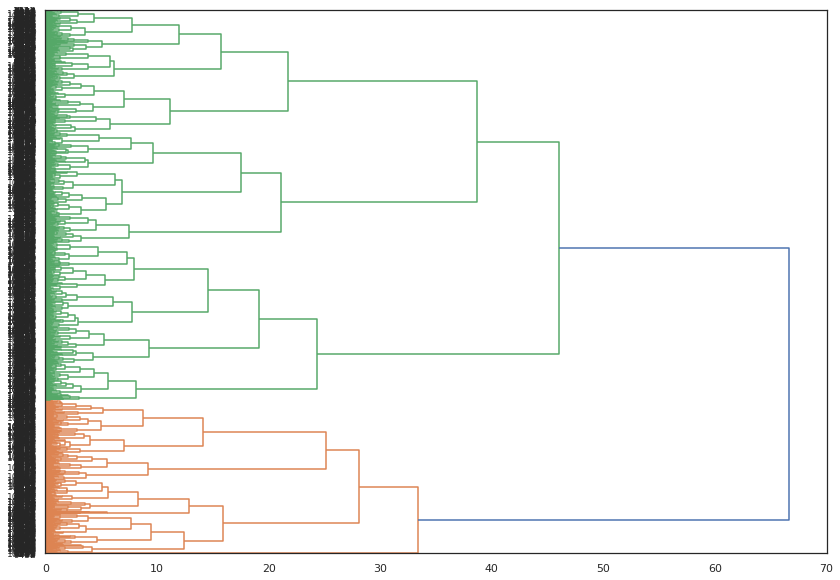

In [29]:
import seaborn as sns
sns.set(style='white', rc={'figure.figsize':(14,10)})

dn = dendrogram(distancias,
                leaf_font_size=9,
                orientation='right',
                labels=df_scaled['ID'].values)

### Análise do dendograma : 

A distância maior entre um grupo e outro aparece na divisão da árvore em dois grupos. Porém, para determinar padrões que não sejam muito generalizados, me parece mais adequado dividir em 4 grupos.

In [30]:
# importando a função fcluster
from scipy.cluster.hierarchy import fcluster

# obtendo grupos levando em consideração a distância
grupos = fcluster(distancias, t=4, criterion = 'maxclust')
grupos[:30]

array([1, 3, 2, 2, 3, 2, 4, 2, 2, 2, 4, 3, 2, 4, 1, 4, 2, 1, 4, 4, 1, 4,
       1, 4, 4, 2, 2, 1, 3, 2], dtype=int32)

In [31]:
df['grupos'] = grupos

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntTotal,Date,Days_Registered,grupos
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,3,11,1,1445,2015-01-01,997,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,3,11,0,25,2015-01-01,151,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,665,2015-01-01,498,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,3,11,0,43,2015-01-01,91,2
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,376,2015-01-01,347,3


### Análise de cada grupo para montarmos nossa persona.

In [32]:
lista = ['Income','MntTotal', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Days_Registered', 'grupos']

In [33]:
grupo1 = df[lista][df['grupos'] == 1]
grupo2 = df[lista][df['grupos'] == 2]
grupo3 = df[lista][df['grupos'] == 3]
grupo4 = df[lista][df['grupos'] == 4]

In [34]:
grupo1.describe()

,Income,MntTotal,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days_Registered,grupos
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.0
mean,76131.274760,1287.862620,1.945687,5.741214,5.619808,8.442492,3.626198,553.324281,1.0
std,27337.043502,419.517277,2.043586,2.600331,2.976041,2.925318,2.194732,236.350577,0.0
min,2447.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.0
25%,67421.750000,981.750000,1.000000,4.000000,4.000000,6.000000,2.000000,381.500000,1.0
50%,74870.000000,1290.000000,1.000000,5.000000,5.000000,8.000000,3.000000,582.500000,1.0
75%,81701.000000,1586.000000,2.000000,7.000000,7.000000,11.000000,5.000000,751.750000,1.0
max,666666.000000,2431.000000,15.000000,27.000000,28.000000,13.000000,9.000000,1089.000000,1.0


### Caracteristicas do grupo 1 : 

1 - Salário mediano : 75K 

2 - Valor total de compra médio : 1287 $

3 - Média de fidelidade (em dias)  : 553 dias

4 - Praça mais usada : Loja física

In [35]:
grupo2.describe()

,Income,MntTotal,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days_Registered,grupos
count,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.0
mean,39652.404056,198.622465,2.288612,2.979719,1.109204,4.255850,6.135725,491.195008,2.0
std,15043.046028,234.445538,1.638219,2.286078,1.547354,2.462862,2.058212,199.120428,0.0
min,1730.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,26.000000,2.0
25%,29672.000000,41.000000,1.000000,1.000000,0.000000,3.000000,5.000000,362.000000,2.0
50%,38201.000000,84.000000,2.000000,2.000000,1.000000,3.000000,6.000000,473.000000,2.0
75%,49494.000000,285.000000,3.000000,4.000000,1.000000,5.000000,7.000000,604.000000,2.0
max,79761.000000,1158.000000,15.000000,25.000000,11.000000,13.000000,20.000000,1089.000000,2.0


### Caracteristicas do grupo 2 : 

1 - Salário mediano : 38K (menor que grupo 1)

2 - Valor total de compra médio : 198 $ (metade da população abaixo de 84 , menor que grupo 1)

3 - Média de fidelidade (em dias)  : 491 dias (menor que grupo 1)

4 - Praça mais usada : Loja (porém mais visitas no site)

In [36]:
grupo3.describe()

,Income,MntTotal,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days_Registered,grupos
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.0
mean,43629.031250,257.656250,2.029018,2.937500,1.417411,4.486607,5.379464,350.812500,3.0
std,17731.404463,321.036217,1.409954,2.332654,1.942659,2.648675,2.255241,158.524744,0.0
min,4023.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,3.0
25%,30564.500000,41.000000,1.000000,1.000000,0.000000,3.000000,4.000000,227.000000,3.0
50%,41137.000000,81.000000,2.000000,2.000000,1.000000,3.000000,6.000000,340.000000,3.0
75%,57386.000000,376.250000,3.000000,4.000000,2.000000,5.000000,7.000000,471.000000,3.0
max,92533.000000,1272.000000,15.000000,23.000000,11.000000,13.000000,19.000000,742.000000,3.0


## Caracteristicas do grupo 3 :

1 - Salário mediano : 41K (menor que grupo 1)

2 - Valor total de compra médio : 257 $ (81 para metade da população, menor que grupo 1)

3 - Média de fidelidade (em dias)  : 350 dias (menor que grupo 1)

4 - Praça mais usada : Loja (porém mais visitas no site)

In [37]:
grupo4.describe()

,Income,MntTotal,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days_Registered,grupos
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.0
mean,46225.017964,425.000000,3.103792,4.457086,2.105788,5.652695,6.335329,746.149701,4.0
std,16789.678733,350.275292,2.256813,2.637547,2.166746,2.952141,2.141805,135.834162,0.0
min,3502.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,455.000000,4.0
25%,35196.000000,94.000000,1.000000,2.000000,1.000000,3.000000,5.000000,648.000000,4.0
50%,47009.000000,359.000000,3.000000,4.000000,1.000000,5.000000,7.000000,722.000000,4.0
75%,57959.000000,674.000000,4.000000,6.000000,3.000000,8.000000,8.000000,842.000000,4.0
max,102160.000000,1373.000000,15.000000,11.000000,11.000000,13.000000,20.000000,1089.000000,4.0


## Caracteristicas do grupo 4 :'

1 - Salário mediano : 47K (menor que grupo 1)

2 - Valor total de compra médio : 425 $ (359 para metade da população, menor que grupo 1)

3 - Média de fidelidade (em dias)  : 746 dias (Maior média)

4 - Praça mais usada : Loja (porém mais visitas no site)

5 - Maior média de compras realizadas com promoções

## Análise da variável salário :

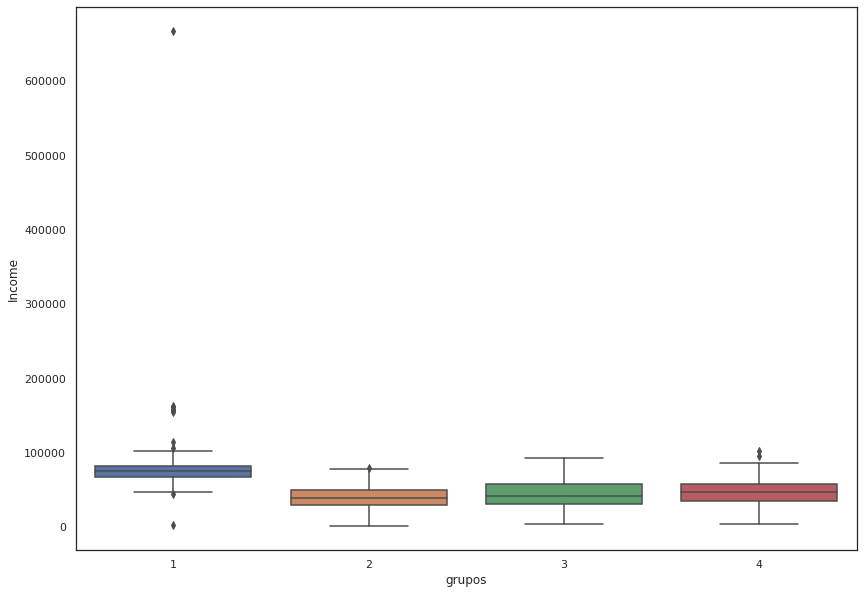

In [38]:
df2 = df.copy()

sns.boxplot(x = df2['grupos'], y = df2['Income']);

Percebemos claramente um outlier no grupo 1 que impede a boa leitura do box plot. Vamos exclui-lo para enxergar melhor as divergencias entre grupos.

In [39]:
filtro = df2.loc[df2['Income'] >= 200000.0]
filtro


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntTotal,Date,Days_Registered,grupos
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-02-06,23,9,...,0,0,0,3,11,0,54,2015-01-01,694,1


In [40]:
df2.drop([2233], axis = 0, inplace = True)

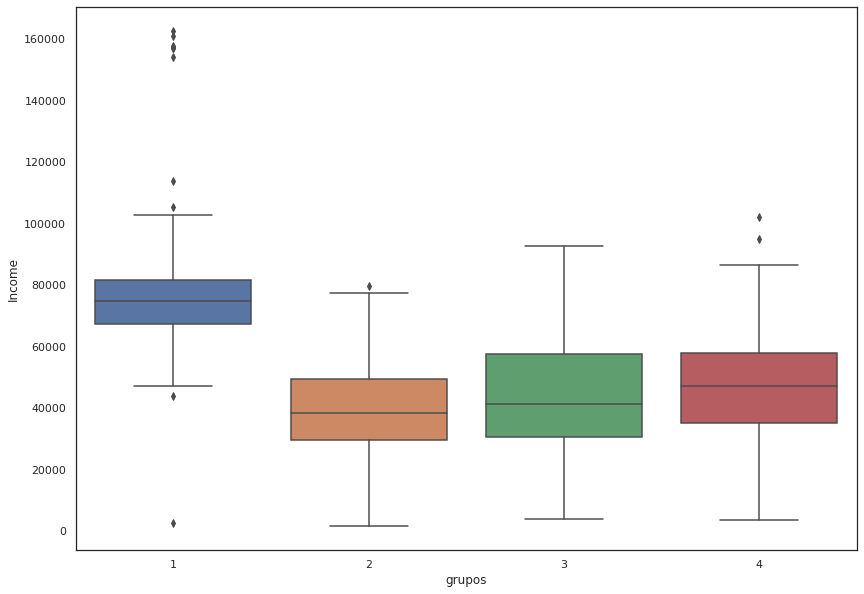

In [41]:
sns.set(style='white', rc={'figure.figsize':(14,10)})
sns.boxplot(x = df2['grupos'], y= df2['Income'])

Apos eliminação do outlier, percebemos uma clara diferença entre os grupos. O grupo 1 é o grupo que tem a maior renda. O demais grupos tem uma renda mais similar mas distribuida de forma diferente.

## Análise do valor de compra : 

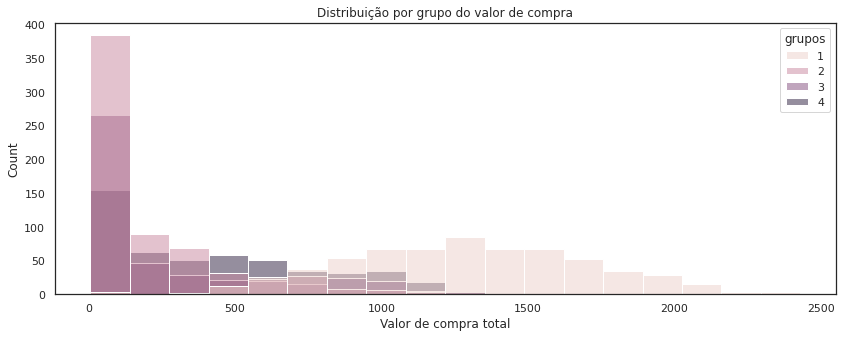

In [42]:
import matplotlib.pyplot as plt
sns.set(style='white', rc={'figure.figsize':(14,5)})

fig, ax = plt.subplots()
sns.histplot(data = df2, x = 'MntTotal', hue = 'grupos')
ax.set(xlabel = 'Valor de compra total', title = 'Distribuição por grupo do valor de compra');


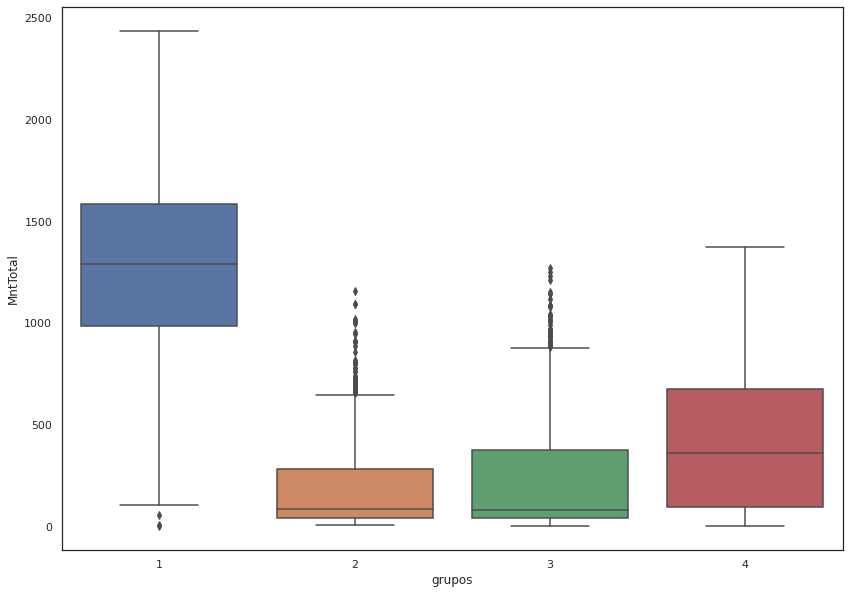

In [43]:
sns.set(style='white', rc={'figure.figsize':(14,10)})
sns.boxplot(x = df2['grupos'], y= df2['MntTotal'])

Por ter uma renda maior, o grupo 1 também tende a gastar mais e está claro essa diferença no boxplot.

### Análise da praça de compra : 

In [44]:
lista_praca = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

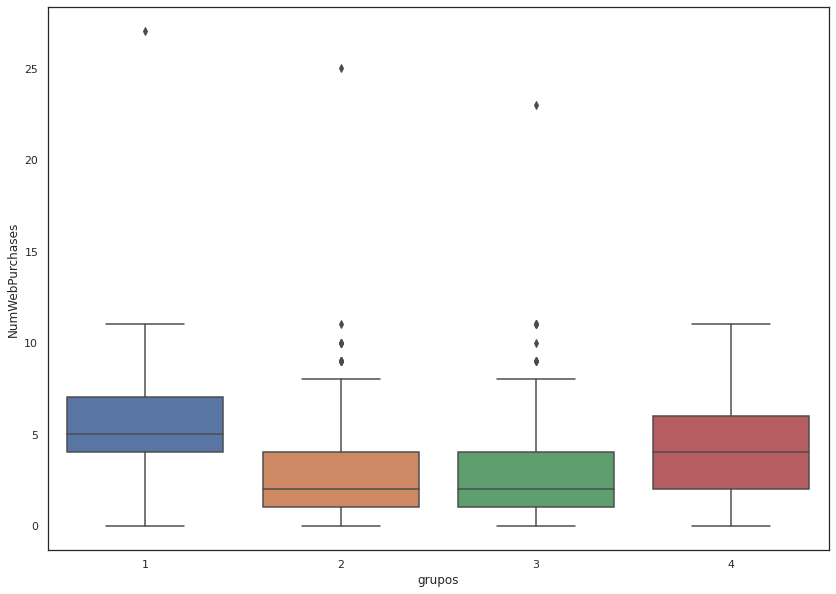

In [45]:
sns.set(style='white', rc={'figure.figsize':(14,10)})
sns.boxplot(x = df2['grupos'], y= df2['NumWebPurchases'])

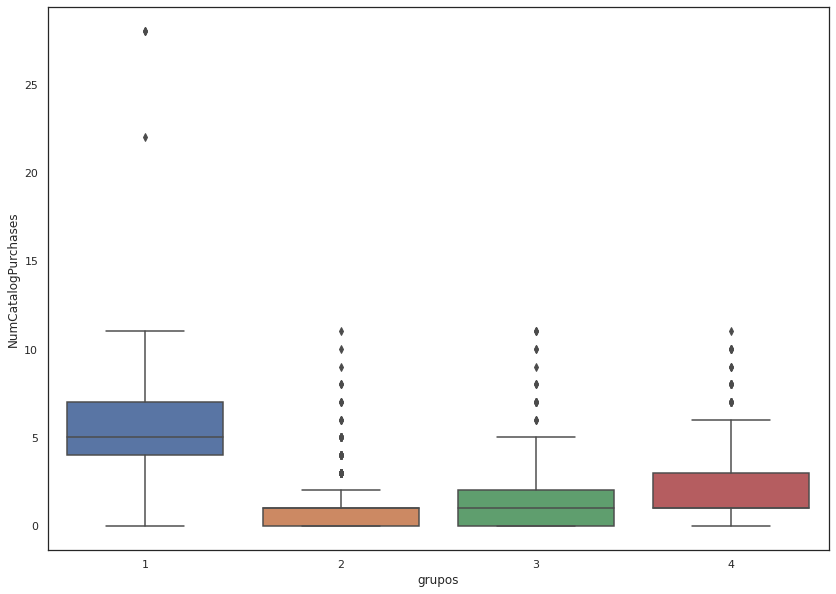

In [46]:
sns.boxplot(x = df2['grupos'], y= df2['NumCatalogPurchases'])

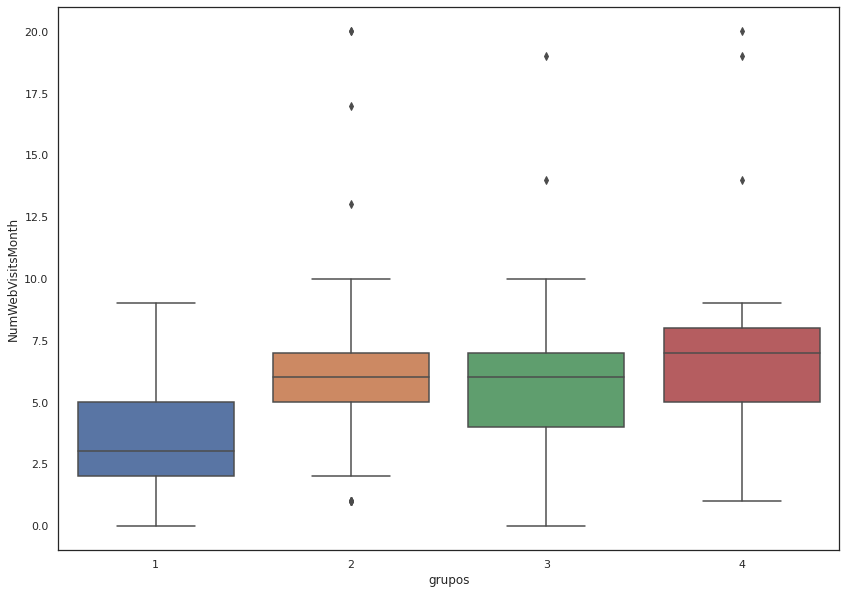

In [47]:
sns.boxplot(x = df2['grupos'], y= df2['NumWebVisitsMonth'])

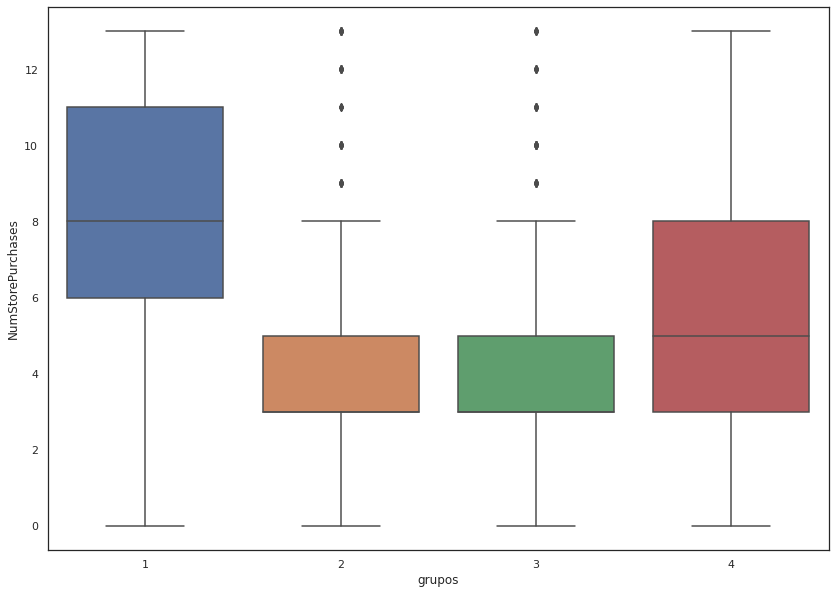

In [48]:
sns.boxplot(x = df2['grupos'], y= df2['NumStorePurchases'])

## Análise do tempo de fidelidade do cliente :

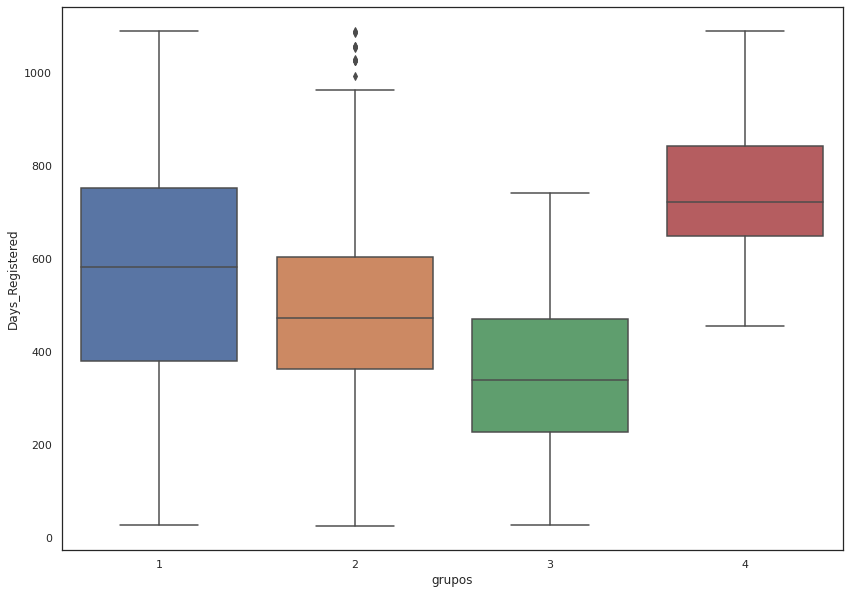

In [49]:
sns.boxplot(x = df2['grupos'], y= df2['Days_Registered'])

## Resumindo : 

In [50]:
grupo1_lista = ['50% possui menos de 75K',
                '50% possui valor de compra de R$ 1280',
                553]

grupo2_lista = ['50% possui menos de 38K',
                '50% possui valor de compra de R$ 84',
                491]

grupo3_lista = ['50% possui menos de 41K',
                '50% possui valor de compra de R$ 81',
                350]

grupo4_lista = ['50% possui menos de 47K',
                '50% possui valor de compra de R$ 359',
                746]

dicio_grupos = {'grupo 1':grupo1_lista,
                'grupo 2':grupo2_lista,
                'grupo 3':grupo3_lista,
                'grupo 4':grupo4_lista}

personas = pd.DataFrame(dicio_grupos, index=['Renda','Valor de compra','Fidelidade (em dias)'])
personas

,grupo 1,grupo 2,grupo 3,grupo 4
Renda,50% possui menos de 75K,50% possui menos de 38K,50% possui menos de 41K,50% possui menos de 47K
Valor de compra,50% possui valor de compra de R$ 1280,50% possui valor de compra de R$ 84,50% possui valor de compra de R$ 81,50% possui valor de compra de R$ 359
Fidelidade (em dias),553,491,350,746


Podemos então considerar que:

* O grupo 1 é composto por pessas que têm altos salários, fazendo várias pedidos pela internet e o valor das compras é alto.  Isto pode sugerir consumidores que não são afetados por promoções e frequentemente comprar produtos de alto valor.

* O grupo 2 é composto por pessoas que têm baixos salários, compram frequentemente, fazendo poucos pedidos pela internet, e em geral, o valor das compras é baixo.

* O grupo 3 é composto por pessoas que têm baixos salários, compram com baixa frequência, fazendo poucos pedidos pela internet e o valor das compras é baixo.Além disso, tem o menor tempo de fidelidade do 4 grupos. Isto pode sugerir consumidores que esperam aparecer promoções online para adquirir produtos de baixo valor.

* O grupo 4 é composto por pessoas que tenham salários médios, compram com baixa frequência e o valor das compras é baixo. Dentre os grupos, este é o que apresenta consumidores registrados a mais tempo, podendo indicar pessoas que têm baixa "lealdade" ou que perderam interesse no estabelecimento/marca. Este grupo também é o grupo que tem mais visitas no website e o segundo que mais compra pela internet. Por isso pode ser interessante enviar promoções através do site para poder atrai-lo.
